In [3]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

In [4]:
models = ["VGG-Face","Facenet","Facenet512","OpenFace","DeepFace","DeepID","ArcFace","Dlib","SFace"]

metrics = ["cosine", "euclidean", "euclidean_l2"]

backends = ['opencv','ssd','dlib','mtcnn','retinaface','mediapipe']

In [5]:
img = cv2.imread("face_recognition_images/Nikhil.jpg")
cv2.imshow("img",img)
while True:
    if cv2.waitKey(20) == 27:
        break
cv2.destroyAllWindows()

In [19]:
def face_capture():
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    cv2.imwrite('face_recognition_images/face.jpg', frame)

    cap.release()
    cv2.destroyAllWindows()

In [37]:
#face_capture()
img1 = cv2.imread("face_recognition_images/Raul.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("face_recognition_images/Raul2.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [40]:
auth_verified = False
auth = DeepFace.verify(img1_path=img1, img2_path=img2, model_name=models[2], enforce_detection=False)
print(auth)
if auth['verified']:
    print("Eres tú")
    auth_verified = True
else:
    print("Fuera fuera fuera fuera")

1/1 [==============================] - 0s 44ms/step
{'verified': True, 'distance': 0.11007805196254994, 'threshold': 0.3, 'model': 'Facenet512', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}
Eres tú


Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    

1/1 [==============================] - 0s 98ms/step


Action: gender:  25%|██▌       | 1/4 [00:00<00:00,  7.09it/s]

1/1 [==============================] - 0s 104ms/step


Action: race:  50%|█████     | 2/4 [00:00<00:00,  7.53it/s]  

1/1 [==============================] - 0s 104ms/step


Action: emotion:  75%|███████▌  | 3/4 [00:00<00:00,  7.65it/s]

1/1 [==============================] - 0s 13ms/step


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  8.89it/s]


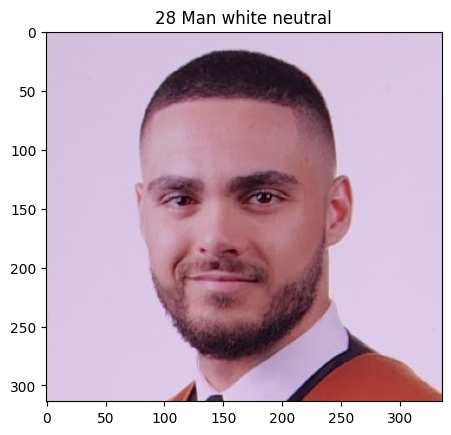

28 Man white neutral
There are  602  representations found in  representations_vgg_face.pkl


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 109ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


find function lasts  0.6119775772094727  seconds
                                             identity  VGG-Face_cosine
0   datasets/DatabaseGender59x65/Male/kelsey_ID0_1...         0.293273
1   datasets/DatabaseGender59x65/Male/PF2136_ID0_1...         0.293396
2   datasets/DatabaseGender59x65/Male/talby_ID0_1.jpg         0.295084
3   datasets/DatabaseGender59x65/Male/img234_ID0_1...         0.298002
4   datasets/DatabaseGender59x65/Male/brad-pitt-2_...         0.302602
5   datasets/DatabaseGender59x65/Male/arcangel_ID0...         0.305069
6   datasets/DatabaseGender59x65/Male/agassi_gal_l...         0.318801
7   datasets/DatabaseGender59x65/Male/cabre3_ID0_1...         0.320332
8   datasets/DatabaseGender59x65/Male/pict0050_ID0...         0.324598
9   datasets/DatabaseGender59x65/Male/larry.zitnic...         0.330239
10  datasets/DatabaseGender59x65/Male/barba_ID0_1.jpg         0.336400
11  datasets/DatabaseGender59x65/Male/raef_lafrent...         0.338322
12  datasets/DatabaseGender5

In [50]:
img3 = cv2.imread("face_recognition_images/Raul.jpg")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
obj = DeepFace.analyze(img_path = img3, actions = ['age', 'gender', 'race', 'emotion'], enforce_detection=False)
edad = obj['age']
genero = obj['gender']
raza = obj['dominant_race']
emocion = obj['dominant_emotion']

plt.figure()
plt.imshow(img3)
plt.title(str(edad)+" " + genero + " " + raza + " " + emocion)
plt.show()
print(edad,genero,raza,emocion)

if (auth_verified and genero == "Man"):
    df = DeepFace.find(img_path = img3, db_path = "datasets/DatabaseGender59x65/Male", distance_metric = metrics[0], prog_bar = False, enforce_detection=False)
    print(df)

elif (auth_verified and genero == "Woman"):
    df = DeepFace.find(img_path = img3, db_path = "datasets/DatabaseGender59x65/Female", enforce_detection=False)
    print(df)

In [46]:
print(df.at[0, 'VGG-Face_cosine'])
print(df.at[0, 'identity'])

0.2932732977050604
datasets/DatabaseGender59x65/Male/kelsey_ID0_1.jpg
